In [1]:
import prediction

Using TensorFlow backend.


### Prepare and Compile model

In [2]:
model = prediction.prepare_model()

### Load Local example files

`../exxample_data/example/`

In [3]:
import os
import sys
import glob
from os.path import dirname, abspath

def get_files(file_path, file_type):
    """Get all files under directory.
    - Args:
        file_path: path of example folder
        FILE_TYPE: type of files, i.e. jpg
    """
    return glob.glob(''.join([file_path, file_type]))

def get_example_path():
    """Get example images path"""
    curent_path = os.path.dirname(os.path.realpath('__file__'))
    exampl_path = '/'.join([os.path.abspath(os.path.join(curent_path, os.pardir)),'example_data/'])
    return exampl_path

example_imgs = get_files(''.join([get_example_path(),'example/']), '*.jpg')
example_imgs

['/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/example_data/example/landscape_reflection.jpg',
 '/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/example_data/example/landscape_road.jpg',
 '/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/example_data/example/landscape_zebra.jpg',
 '/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/example_data/example/sailing_landscape.jpg',
 '/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/example_data/example/sailing_media_capture.jpg',
 '/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/example_data/example/sailing_portrait.jpg',
 '/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/example_data/example/sailing_setting.jpg']

### Make prediction

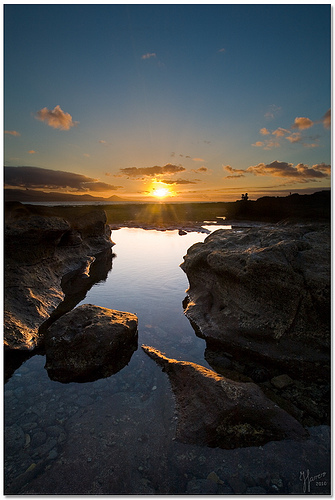

(0.95412534, ('landscape', 2))


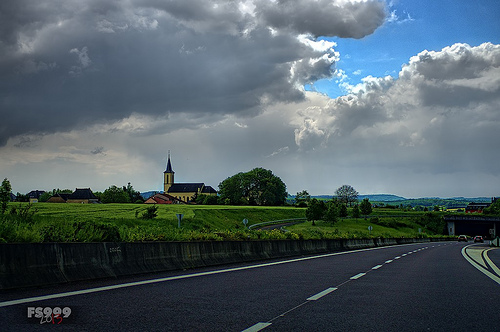

(0.65606087, ('landscape', 2))


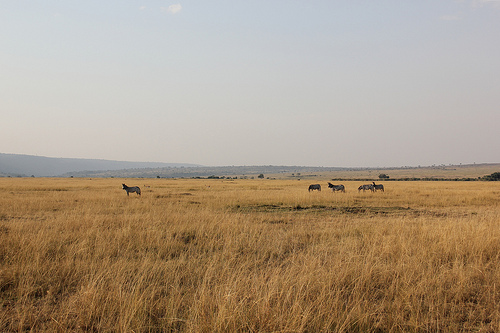

(0.99994802, ('landscape', 2))


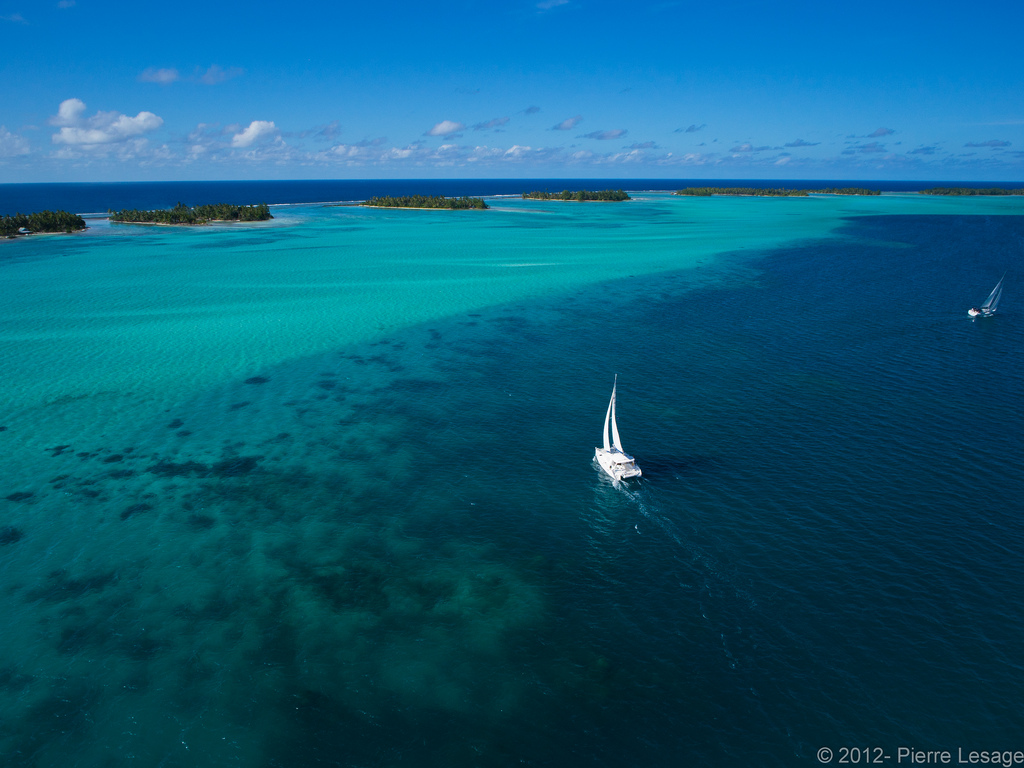

(0.99998391, ('landscape', 2))


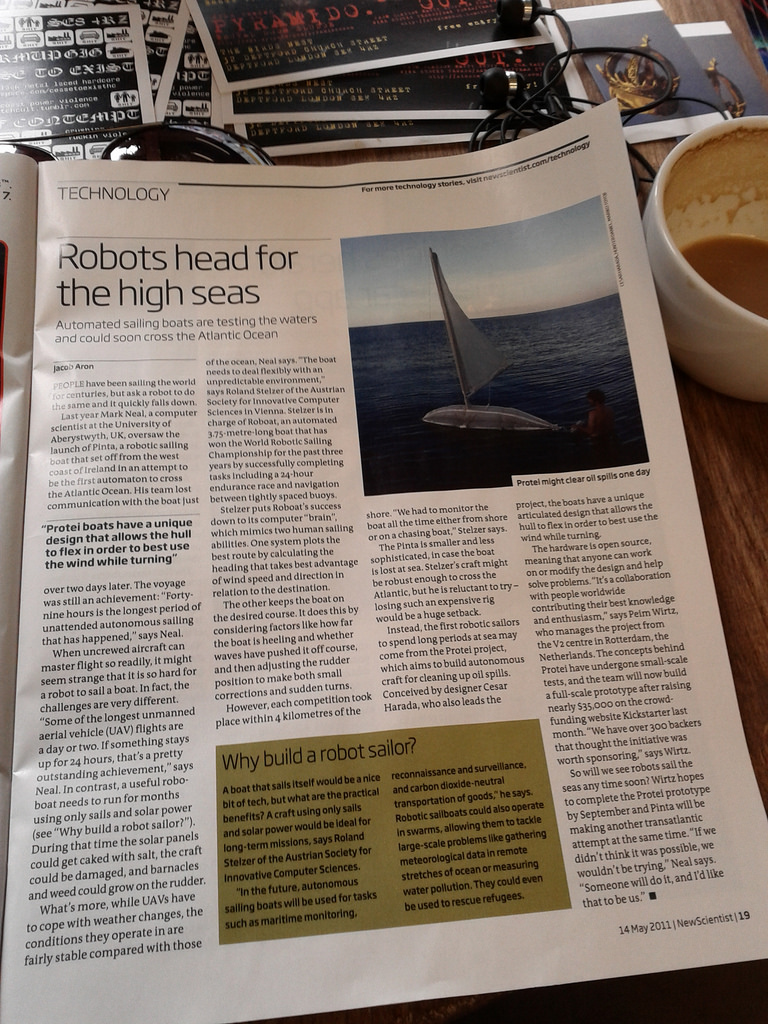

(0.99784076, ('media_capture', 4))


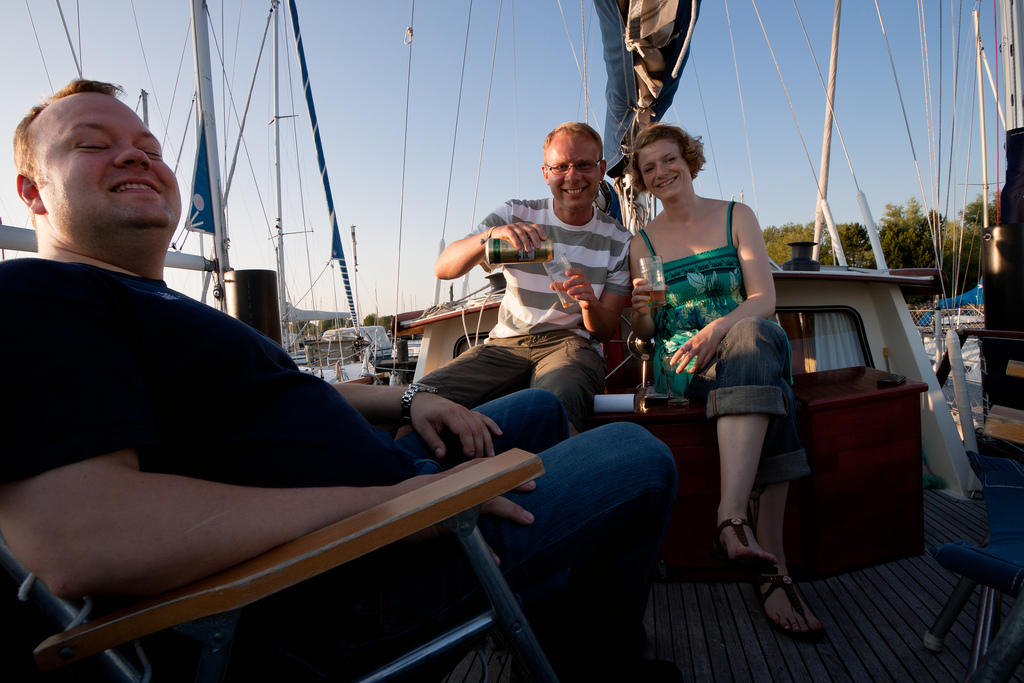

(0.48152971, ('portrait', 5))


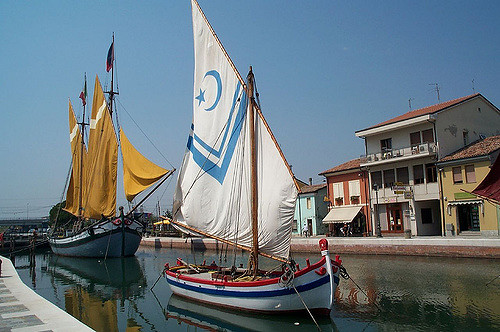

(0.98126823, ('setting', 7))


In [7]:
from IPython.display import Image, display

for idx,img in enumerate(example_imgs):
    display(Image(img))
    print prediction.make_prediction(url=None, img_id=idx, model=model, classes=prediction.classes, from_path=img)

### Diversification Example

Load all data from `example_data/diversification`

Noted that the ranking position of images was given by original Flickr baseline.

The associated query is `accordion_player`.

In [43]:
import pandas as pd

photos_accordion_player = pd.read_csv("".join([get_example_path(), 'diversification/accordion_player.csv']))
photo_base_path = ''.join([get_example_path(),'diversification/'])
photo_path = []
for idx, photo in photos_accordion_player.iterrows():
    photo_path.append(''.join([photo_base_path, str(idx), '.jpg']))

photos_accordion_player['path'] = photo_path
photos_accordion_player.head(5)

,description,id,tag,title,url,path
0,NaN,8692618114,mexico mexicocity accordion hdr panhandling ph...,Mexico City accordion player,https://farm9.staticflickr.com/8265/8692618114...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...
1,This gentleman was playing the accordion near ...,14988067616,travel paris france photography europe îledefr...,The Accordion Player,https://farm6.staticflickr.com/5554/1498806761...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...
2,NaN,16023880894,street portrait urban blackandwhite bw musicia...,"Accordion player, Canterbury",https://farm9.staticflickr.com/8670/1602388089...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...
3,An accordion player from Jerez de Garcia Salin...,16066297436,musician music canon mexico zacatecas jerezdeg...,Accordion player,https://farm9.staticflickr.com/8640/1606629743...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...
4,Mexico City www.artotems.com,11161735116,street mexico lemon mexicocity accordion stree...,Lemon Eater and Accordion Player,https://farm3.staticflickr.com/2817/1116173511...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...


#### Predict intents based on top-ranked images

In [48]:
# predict intents
from tqdm import tqdm

def predict_intents(original_rank):
    """For top 20 images, predict intents."""
    res = []
    for idx, p in tqdm(original_rank.iterrows()):
        prob, label = prediction.make_prediction(None, idx, model, prediction.classes, p.path)
        p['prob'] = prob
        p['label'] = label[0]
        p['rank'] = idx
        res.append(p)

    return pd.DataFrame(res)

photos_accordion_player = predict_intents(photos_accordion_player)
photos_accordion_player.head(5)

20it [00:09,  2.31it/s]


,description,id,tag,title,url,path,prob,label,rank
0,NaN,8692618114,mexico mexicocity accordion hdr panhandling ph...,Mexico City accordion player,https://farm9.staticflickr.com/8265/8692618114...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...,0.321620,candid,0
1,This gentleman was playing the accordion near ...,14988067616,travel paris france photography europe îledefr...,The Accordion Player,https://farm6.staticflickr.com/5554/1498806761...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...,0.647825,candid,1
2,NaN,16023880894,street portrait urban blackandwhite bw musicia...,"Accordion player, Canterbury",https://farm9.staticflickr.com/8670/1602388089...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...,0.884002,candid,2
3,An accordion player from Jerez de Garcia Salin...,16066297436,musician music canon mexico zacatecas jerezdeg...,Accordion player,https://farm9.staticflickr.com/8640/1606629743...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...,0.659415,candid,3
4,Mexico City www.artotems.com,11161735116,street mexico lemon mexicocity accordion stree...,Lemon Eater and Accordion Player,https://farm3.staticflickr.com/2817/1116173511...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...,0.753753,candid,4


#### Rank based on intent clusters

In [55]:
# rerank based on intents
def re_rank(original_rank):
    """Rerank based on intents."""
    grouped = original_rank.groupby(['label'])
    groups = grouped.groups
    # for each group, pick top 1 and re-rank by ranking position
    big_groups = []
    for idx in range(0,19):
        small_group = []
        for k in groups:
            try:
                small_group.append(groups.get(k)[idx])
            except IndexError:
                pass
        if small_group:
            big_groups.append(small_group)
    # for each group within big groups, sort by original ranking position
    re_ranked_df = []
    for g in big_groups:
        group_df =  original_rank.iloc[g]
        group_df = group_df.sort_values(by = ['rank'])
        re_ranked_df.append(group_df)
    re_ranked_df = pd.concat(re_ranked_df, axis=0)
    return re_ranked_df

reranked_accordion_player = re_rank(photos_accordion_player)
reranked_accordion_player.head(3)

,description,id,tag,title,url,path,prob,label,rank
0,NaN,8692618114,mexico mexicocity accordion hdr panhandling ph...,Mexico City accordion player,https://farm9.staticflickr.com/8265/8692618114...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...,0.321620,candid,0
5,"PLEASE, NO invitations or self promotions, THE...",15090558203,france town wine sony free dennis jarvis chate...,France-001892 - Bell Tower & Accordions...,https://farm4.staticflickr.com/3937/1509055820...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...,0.999997,structure,5
6,"PLEASE, NO invitations or self promotions, THE...",15524404308,france town wine sony free dennis jarvis chate...,France-001886 - Listen to the Music,https://farm9.staticflickr.com/8559/1552440430...,/Users/wbcha/Desktop/project/ACMMM-MUSA-2017/e...,0.985950,social_event_public,6


In [59]:
# show result
def paste_images(dataframe):
    import sys
    from PIL import Image

    images = map(Image.open, dataframe.path)
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGBA', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    return new_im

In [84]:
reranked_image = paste_images(reranked_accordion_player)
original_image = paste_images(photos_accordion_player)

### Original Flickr ranking and intent-based diversification

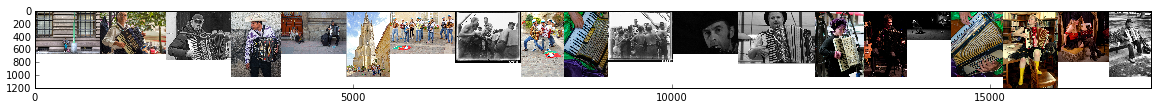

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline
fig = plt.figure(figsize = (20,20))
imshow(np.asanyarray(original_image))

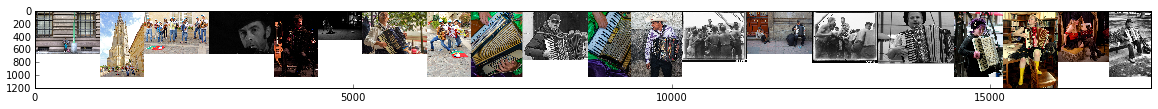

In [87]:
fig = plt.figure(figsize = (20,20))
imshow(np.asarray(reranked_image))